In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# K-Armed Bandit 

In [2]:
class MultiArmBandit:
    def __init__(self, k, debug=False):
        self.k = k
        self.possible_actions = np.zeros(k)
        self.qa = np.random.normal(0, 1, k)

    def pull_arm(self, action, debug=False):
        reward = np.random.normal(self.qa[action], 1)
        return reward

    def print_actions(self):
        print(f'Possible actions - {self.possible_actions}')

# Greedy

In [3]:
class Greedy:
    def __init__(self, Q1, mab):
        self.Q1 = Q1
        self.mab = mab
        self.k = mab.k
        self.Qa = np.full((self.k), self.Q1)
        self.Na = np.zeros(self.k)
        self.total_reward = 0

    def run(self, iteration, debug=False):
        self.reward = np.zeros(iteration)
        num_steps = 1
        while(num_steps < iteration):
            action = self.select_action()
            current_reward = self.mab.pull_arm(action)
            self.total_reward += current_reward
            self.reward[num_steps] = current_reward
            if(debug):
                print(f'Current reward : {self.total_reward}')
            self.Na[action] += 1
            self.Qa[action] = self.Qa[action] + (1 / self.Na[action]) * (current_reward - self.Qa[action])
            num_steps += 1
        return self.reward, self.total_reward

    def select_action(self):
        # Exploit
        action = np.argmax(self.Qa)
        return action

    def reset(self):
        self.Qa = np.full((self.k), self.Q1)
        self.Na = np.zeros(self.k)
        self.total_reward = 0

# Epsilon greedy

In [4]:
class Egreedy:
    def __init__(self, epsilon, mab):
        self.mab = mab
        self.k = mab.k
        self.Qa = np.zeros(self.k)
        self.Na = np.zeros(self.k)
        self.total_reward = 0
        self.epsilon = epsilon

    def run(self, iteration, debug=False):
        self.reward = np.zeros(iteration)
        num_steps = 1
        while(num_steps < iteration):
            action = self.select_action(self.epsilon)
            current_reward = self.mab.pull_arm(action)
            self.total_reward += current_reward
            self.reward[num_steps] = current_reward
            if(debug):
                print(f'Current reward : {self.total_reward}')
            self.Na[action] += 1
            self.Qa[action] = self.Qa[action] +(1 / self.Na[action]) * (current_reward - self.Qa[action])
            num_steps += 1
        return self.reward, self.total_reward

    def select_action(self, epsilon):
        selection_index = np.random.uniform(0, 1)
        # Exploit
        if(selection_index > epsilon):
            action = np.argmax(self.Qa)
        # Explore
        else:
            action = np.random.randint(low=0, high=self.mab.k)
        return action

    def reset(self):
        self.Qa = np.zeros(self.k)
        self.Na = np.zeros(self.k)
        self.total_reward = 0

# Upper Confidence Bound

In [8]:
class UCB:
    def __init__(self, c, mab):
        self.mab = mab
        self.k = mab.k
        self.Qa = np.zeros(self.k)
        self.Na = np.zeros(self.k)
        self.total_reward = 0
        self.c = c

    def run(self, iteration, debug=False):
        self.reward = np.zeros(iteration)
        num_steps = 1
        while(num_steps < iteration):
            action = self.select_action(num_steps)
            current_reward = self.mab.pull_arm(action)
            self.total_reward += current_reward
            self.reward[num_steps] = current_reward
            if(debug):
                print(f'Current reward : {self.total_reward}')
            self.Na[action] += 1
            self.Qa[action] = self.Qa[action] + (1 / self.Na[action]) * (current_reward - self.Qa[action])
            num_steps += 1
        return self.reward, self.total_reward

    def select_action(self, t):
        action = np.argmax(self.Qa+self.c*np.sqrt(np.log(t)/self.Na))
        return action

    def reset(self):
        self.Qa = np.zeros(self.k)
        self.Na = np.zeros(self.k)
        self.total_reward = 0

In [5]:
class RunIteration:
    def __init__(self):
        self.results = pd.DataFrame()
        
    def run_iteration(self, alg, iteration=1000, episodes=100, alg_name=""):
        self.episodes = episodes
        results = pd.DataFrame()
        for i in np.arange(episodes):
            reward, total_reward = alg.run(iteration)
            results = pd.concat([results, pd.DataFrame(reward)], axis=1)
            alg.reset()
        mean_results = results.mean(axis=1)
        mean_results = mean_results.reset_index().T.drop('index')
        mean_results['alg_name'] = alg_name
        mean_results = mean_results.set_index('alg_name')
        self.results = pd.concat([self.results, pd.DataFrame(mean_results)], axis=0)
        

    def plot(self, alg_name=""):
        ax = self.results.T.plot(title=f'{alg_name}', figsize=(12,10), 
                                           xlabel=f'Iteration', ylabel=f'Average reward over {self.episodes} episodes')
        plt.show()


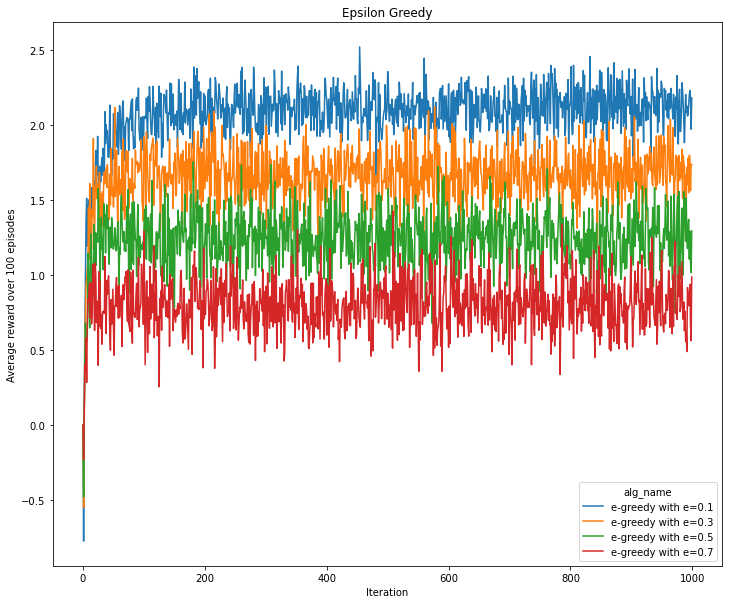

In [6]:
k = 5
mab = MultiArmBandit(k)
runner_greedy = RunIteration()

eps=0.1
eps_greedy = Egreedy(epsilon=eps, mab=mab)
runner_greedy.run_iteration(alg=eps_greedy, iteration=1000, episodes=100, alg_name=f'e-greedy with e={eps}')

eps=0.3
eps_greedy = Egreedy(epsilon=eps, mab=mab)
runner_greedy.run_iteration(alg=eps_greedy, iteration=1000, episodes=100, alg_name=f'e-greedy with e={eps}')

eps=0.5
eps_greedy = Egreedy(epsilon=eps, mab=mab)
runner_greedy.run_iteration(alg=eps_greedy, iteration=1000, episodes=100, alg_name=f'e-greedy with e={eps}')

eps=0.7
eps_greedy = Egreedy(epsilon=eps, mab=mab)
runner_greedy.run_iteration(alg=eps_greedy, iteration=1000, episodes=100, alg_name=f'e-greedy with e={eps}')

runner_greedy.plot(alg_name='Epsilon Greedy')


/tmp/ipykernel_4041/2643700169.py:26: RuntimeWarning: invalid value encountered in true_divide
  action = np.argmax(self.Qa+self.c*np.sqrt(np.log(t)/self.Na))
/tmp/ipykernel_4041/2643700169.py:26: RuntimeWarning: divide by zero encountered in true_divide
  action = np.argmax(self.Qa+self.c*np.sqrt(np.log(t)/self.Na))


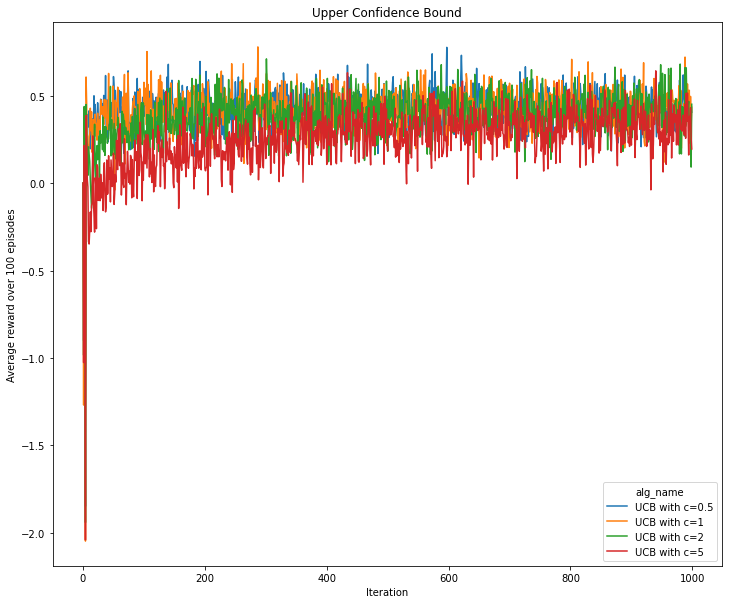

In [9]:
k = 5
mab = MultiArmBandit(k)
runner_ucb = RunIteration()

c = 0.5
ucb = UCB(c=c, mab=mab)
runner_ucb.run_iteration(alg=ucb, iteration=1000, episodes=100, alg_name=f'UCB with c={c}')

c = 1
ucb = UCB(c=c, mab=mab)
runner_ucb.run_iteration(alg=ucb, iteration=1000, episodes=100, alg_name=f'UCB with c={c}')

c = 2
ucb = UCB(c=c, mab=mab)
runner_ucb.run_iteration(alg=ucb, iteration=1000, episodes=100, alg_name=f'UCB with c={c}')

c = 5
ucb = UCB(c=c, mab=mab)
runner_ucb.run_iteration(alg=ucb, iteration=1000, episodes=100, alg_name=f'UCB with c={c}')

runner_ucb.plot(alg_name='Upper Confidence Bound')

/tmp/ipykernel_4041/2643700169.py:26: RuntimeWarning: invalid value encountered in true_divide
  action = np.argmax(self.Qa+self.c*np.sqrt(np.log(t)/self.Na))
/tmp/ipykernel_4041/2643700169.py:26: RuntimeWarning: divide by zero encountered in true_divide
  action = np.argmax(self.Qa+self.c*np.sqrt(np.log(t)/self.Na))


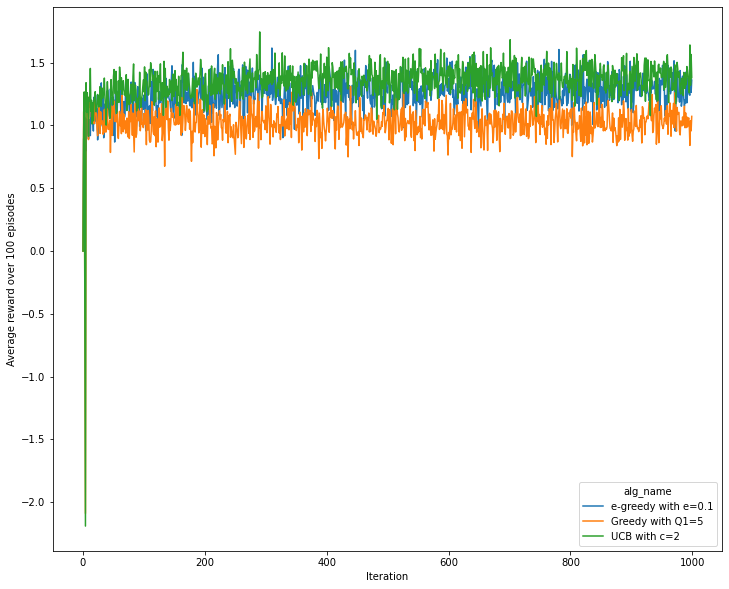

In [10]:
k = 5
mab = MultiArmBandit(k)
iteration_runner = RunIteration()

eps = 0.1
eps_greedy = Egreedy(epsilon=eps, mab=mab)
iteration_runner.run_iteration(alg=eps_greedy, iteration=1000, episodes=100, alg_name=f'e-greedy with e={eps}')

q1 = 5
greedy = Greedy(Q1=q1, mab=mab)
iteration_runner.run_iteration(alg=greedy, iteration=1000, episodes=100, alg_name=f'Greedy with Q1={q1}')

c = 2
ucb = UCB(c=c, mab=mab)
iteration_runner.run_iteration(alg=ucb, iteration=1000, episodes=100, alg_name=f'UCB with c={c}')

iteration_runner.plot()
